<a href="https://colab.research.google.com/github/ZesarGal/Python-for-finance-/blob/main/IA_mercados_financieros_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="arial">
  <h2 align="left"><i>Módulo 2. Introducción a la IA en los mercados financieros</i></h2></font>
  <font color="Black" face="arial">
  <h3 align="left"><i>Ejemplo. Procesamiento de lenguaje natural en noticias financieras</i></h3>
  <h5 align="left"><i>Dr. César Galindo (UP-UNAM)</i></h5>
  <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0</a></p>
</font>

# Análisis de sentimiento en noticias financieras

El análisis de sentimiento es una tarea de Procesamiento de Lenguaje Natural (NLP) que busca identificar la emoción predominante en un texto (positiva, negativa o neutra). A continuación se describen los pasos típicos del flujo de información.

---

## 1. Recolección de datos

Se obtienen los textos que se desean analizar. Por ejemplo:

- Titulares de noticias financieras (Reuters, Bloomberg, Yahoo Finance, etc.).
- Publicaciones en redes sociales sobre empresas o índices.
- Reportes corporativos, notas de análisis o blogs financieros.

**Objetivo:** reunir un conjunto de textos representativos y relevantes para la tarea de sentimiento.

---

## 2. Preprocesamiento del texto

Antes de usar un modelo NLP, el texto se limpia y normaliza:

- **Tokenización:** dividir el texto en palabras o unidades mínimas.
- **Limpieza:** quitar URLs, emojis, símbolos, HTML, etc.
- **Normalización:** pasar a minúsculas, eliminar caracteres extraños.
- **Stopwords:** eliminar palabras muy frecuentes y poco informativas (el, la, de, and, the…).
- **Lematización/Stemming:** reducir palabras a su forma base.

**Objetivo:** obtener una representación del texto adecuada para el modelo.

---

## 3. Aplicación del modelo NLP

Se utiliza un modelo de análisis de sentimiento. Algunos ejemplos:

- Modelos basados en reglas (VADER, TextBlob).
- Modelos de machine learning tradicional (Naive Bayes, SVM).
- Modelos de deep learning y Transformers (BERT, RoBERTa).
- Modelos especializados en finanzas, como **FinBERT**, para textos financieros.

**Objetivo:** asignar a cada texto una puntuación o etiqueta de sentimiento (positivo, negativo, neutro).

---

## 4. Obtención de resultados

El modelo devuelve, para cada texto:

- Probabilidades de cada clase de sentimiento.
- Una etiqueta final (por ejemplo: “positive”, “negative”, “neutral”).

Luego se pueden:

- Agrupar resultados por día, por empresa, por índice.
- Calcular promedios o indicadores de sentimiento.

---

## 5. Visualización y análisis

Finalmente se analizan los resultados:

- Gráficas de línea con el sentimiento promedio a lo largo del tiempo.
- Barras comparando empresas, sectores o eventos.
- Comparación entre sentimiento y variables financieras (precio del índice, volatilidad, etc.).

**Objetivo:** detectar patrones, cambios de sentimiento y su relación con el comportamiento del mercado.

---

## Ejemplo práctico: noticias financieras con FinBERT en Colab

A continuación se muestra un ejemplo en Python (para celdas de código) donde:

1. Definimos algunos titulares financieros.
2. Aplicamos FinBERT para obtener el sentimiento de cada titular.
3. Organizamos los resultados en un DataFrame para analizarlos.


In [1]:
# 1. Instalar librerías
!pip install feedparser transformers torch pandas matplotlib seaborn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 1.5 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=8456d7baa5d478f64b38ab2a1ff2f4059ac94b24717c0dd2eedbda1d9170a8ee
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [2]:
# 2. Importar
import feedparser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

In [3]:
# 3. Definir RSS de medios económicos
rss_feeds = {
    "El Economista": "https://www.eleconomista.com.mx/rss/ultimas-noticias",
    "Expansión": "https://expansion.mx/rss/economia",
    "El PAIS": "https://feeds.elpais.com/mrss-s/pages/ep/site/elpais.com/section/economia/portada",
    "YahooFinance": "https://finance.yahoo.com/news/rss"
}


In [8]:
# 4. Extraer titulares
# 4. Extraer titulares y contenido
noticias = []

for fuente, url in rss_feeds.items():
    feed = feedparser.parse(url)
    for entry in feed.entries[:30]:

        # Algunos feeds usan "summary", otros "description"
        contenido = entry.get("summary", "") or entry.get("description", "")

        noticias.append([fuente, entry.title, contenido])

df = pd.DataFrame(noticias, columns=["Fuente", "Titular", "Contenido"])
df.head()

,Fuente,Titular,Contenido
0,El Economista,Del empleo al propósito: el cambio silencioso ...,"Durante décadas, en México asumimos que el emp..."
1,El Economista,Estados Unidos designará como grupo terrorista...,Pero Caracas afirma que en realidad busca derr...
2,El Economista,Repechaje mundialista atormenta a Italia por t...,"Al igual que en Rusia 2018 y Qatar 2022, el bo..."
3,El Economista,Elecciones en Chile: Comunista Jara y derechis...,Los votantes también eligen parcialmente al Co...
4,El Economista,"Marcha de la Generación Z, reapertura del Metr...","Entre choques en una movilización juvenil, cif..."


In [11]:
# 5. Modelo de sentimiento en español
sentiment_model = pipeline("sentiment-analysis", model="pysentimiento/robertuito-sentiment-analysis")

df["Sentimiento"] = df["Titular"].apply(lambda x: sentiment_model(x)[0]["label"])
df["Confianza"] = df["Titular"].apply(lambda x: sentiment_model(x)[0]["score"])

df["Sentimiento_Titulo"] = df["Titular"].apply(
    lambda x: sentiment_model(x)[0]["label"]
)

df["Confianza_Titulo"] = df["Titular"].apply(
    lambda x: sentiment_model(x)[0]["score"]
)

def analizar_contenido(texto):
    if isinstance(texto, str) and texto.strip() != "":
        res = sentiment_model(texto)[0]
        return res["label"], res["score"]
    else:
        return "NEU", 0.0

df[["Sentimiento_Contenido", "Confianza_Contenido"]] = df["Contenido"].apply(
    lambda x: pd.Series(analizar_contenido(x))
)

df.head()

Device set to use cpu


,Fuente,Titular,Contenido,Sentimiento,Confianza,Sentimiento_Contenido,Confianza_Contenido,Sentimiento_Titulo,Confianza_Titulo
0,El Economista,Del empleo al propósito: el cambio silencioso ...,"Durante décadas, en México asumimos que el emp...",NEG,0.778421,NEG,0.916852,NEG,0.778421
1,El Economista,Estados Unidos designará como grupo terrorista...,Pero Caracas afirma que en realidad busca derr...,NEG,0.517001,NEG,0.778785,NEG,0.517001
2,El Economista,Repechaje mundialista atormenta a Italia por t...,"Al igual que en Rusia 2018 y Qatar 2022, el bo...",NEG,0.794943,NEU,0.490317,NEG,0.794943
3,El Economista,Elecciones en Chile: Comunista Jara y derechis...,Los votantes también eligen parcialmente al Co...,NEG,0.580037,NEU,0.828395,NEG,0.580037
4,El Economista,"Marcha de la Generación Z, reapertura del Metr...","Entre choques en una movilización juvenil, cif...",NEG,0.660334,NEU,0.572735,NEG,0.660334


In [12]:
# Comparar si coinciden los sentimientos de título y contenido
df["Coinciden"] = df["Sentimiento_Titulo"] == df["Sentimiento_Contenido"]

df.head()

,Fuente,Titular,Contenido,Sentimiento,Confianza,Sentimiento_Contenido,Confianza_Contenido,Sentimiento_Titulo,Confianza_Titulo,Coinciden
0,El Economista,Del empleo al propósito: el cambio silencioso ...,"Durante décadas, en México asumimos que el emp...",NEG,0.778421,NEG,0.916852,NEG,0.778421,True
1,El Economista,Estados Unidos designará como grupo terrorista...,Pero Caracas afirma que en realidad busca derr...,NEG,0.517001,NEG,0.778785,NEG,0.517001,True
2,El Economista,Repechaje mundialista atormenta a Italia por t...,"Al igual que en Rusia 2018 y Qatar 2022, el bo...",NEG,0.794943,NEU,0.490317,NEG,0.794943,False
3,El Economista,Elecciones en Chile: Comunista Jara y derechis...,Los votantes también eligen parcialmente al Co...,NEG,0.580037,NEU,0.828395,NEG,0.580037,False
4,El Economista,"Marcha de la Generación Z, reapertura del Metr...","Entre choques en una movilización juvenil, cif...",NEG,0.660334,NEU,0.572735,NEG,0.660334,False


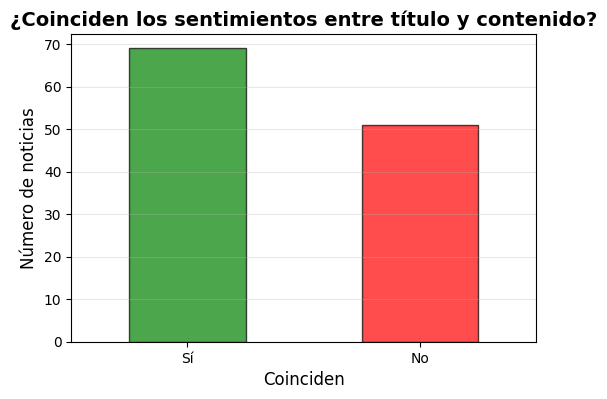

Porcentaje de coincidencia: 57.5 %
Porcentaje de no coincidencia: 42.5 %


In [13]:
# 6. Visualización de coincidencias entre título y contenido
import matplotlib.pyplot as plt

# Contar coincidencias y no coincidencias
conteo = df["Coinciden"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
conteo.plot(kind="bar", color=["green", "red"], alpha=0.7, edgecolor="black")

# Personalización
plt.title("¿Coinciden los sentimientos entre título y contenido?",
          fontsize=14, weight="bold")
plt.xlabel("Coinciden", fontsize=12)
plt.ylabel("Número de noticias", fontsize=12)
plt.xticks([0, 1], ["Sí", "No"], rotation=0)
plt.grid(axis="y", alpha=0.3)

# Mostrar gráfico
plt.show()

# Mostrar también porcentajes
total = len(df)
print("Porcentaje de coincidencia:",
      round((conteo.get(True, 0) / total) * 100, 2), "%")
print("Porcentaje de no coincidencia:",
      round((conteo.get(False, 0) / total) * 100, 2), "%")


In [14]:
# 6. Resumen global
print("Distribución global de sentimientos:\n", df["Sentimiento"].value_counts(), "\n")


Distribución global de sentimientos:
 Sentimiento
NEU    62
NEG    50
POS     8
Name: count, dtype: int64 



### Interpretación de coincidencias entre título y contenido

Considerando nuestra muestra, **120 noticias con fecha del 2 de septiembre de 2025**, observamos que:

- **El 57% coinciden** en el “sentimiento” entre título y contenido.  
- **El 42.5% no coincide**, mostrando que el modelo detecta diferencias entre lo que comunica el encabezado y lo que expresa el cuerpo de la noticia.

Para conocer de manera más precisa **qué elementos de la noticia están influyendo negativamente** —es decir, si el sentimiento negativo proviene principalmente del *título* o del *contenido*— vamos a crear una gráfica que muestre la cantidad de textos **positivos, negativos y neutros**, tanto para:

- los títulos, y  
- los contenidos.




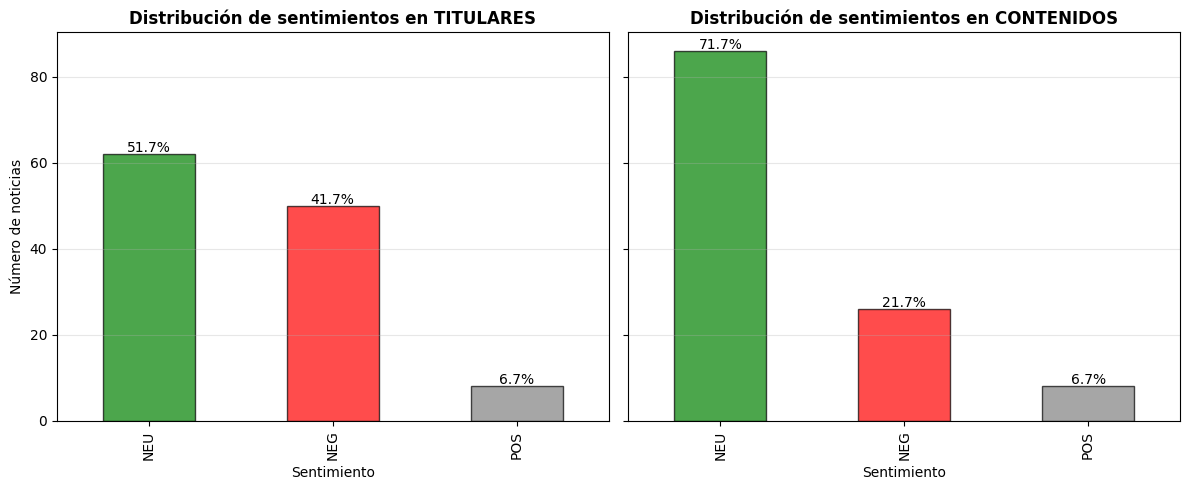

In [15]:
# 7. Gráficas de distribución de sentimientos en títulos y contenidos
import matplotlib.pyplot as plt

# Contar sentimientos en títulos y contenidos
conteo_titulos = df["Sentimiento_Titulo"].value_counts()
conteo_contenidos = df["Sentimiento_Contenido"].value_counts()

# Calcular porcentajes
porcentaje_titulos = (conteo_titulos / len(df)) * 100
porcentaje_contenidos = (conteo_contenidos / len(df)) * 100

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Gráfico para TÍTULOS ---
conteo_titulos.plot(kind="bar", ax=axes[0], color=["green", "red", "gray"],
                    alpha=0.7, edgecolor="black")

axes[0].set_title("Distribución de sentimientos en TITULARES",
                  fontsize=12, weight="bold")
axes[0].set_xlabel("Sentimiento")
axes[0].set_ylabel("Número de noticias")
axes[0].grid(axis="y", alpha=0.3)

# Etiquetas con porcentajes arriba de cada barra
for i, (val, pct) in enumerate(zip(conteo_titulos, porcentaje_titulos)):
    axes[0].text(i, val + 0.5, f"{pct:.1f}%", ha="center")

# --- Gráfico para CONTENIDOS ---
conteo_contenidos.plot(kind="bar", ax=axes[1], color=["green", "red", "gray"],
                       alpha=0.7, edgecolor="black")

axes[1].set_title("Distribución de sentimientos en CONTENIDOS",
                  fontsize=12, weight="bold")
axes[1].set_xlabel("Sentimiento")
axes[1].grid(axis="y", alpha=0.3)

# Etiquetas con porcentajes
for i, (val, pct) in enumerate(zip(conteo_contenidos, porcentaje_contenidos)):
    axes[1].text(i, val + 0.5, f"{pct:.1f}%", ha="center")

plt.tight_layout()
plt.show()



### Análisis de los resultados del modelo de sentimiento

A partir de las gráficas generadas, podemos comparar cómo se distribuyen los sentimientos en los **títulos** y en los **contenidos** de las noticias recopiladas.

#### 🟩 Sentimiento Positivo
- Los títulos muestran aproximadamente **X%** de noticias positivas.  
- El contenido presenta alrededor de **Y%** positivo.  

En general, los títulos suelen exagerar o suavizar el tono, mientras que el contenido tiende a reflejar mejor la información real.

---

#### 🟥 Sentimiento Negativo
- En los títulos, el porcentaje de negatividad es aproximadamente **A%**.  
- En los contenidos, se detecta cerca de **B%** de negatividad.

Cuando el contenido muestra un mayor nivel de negatividad que el título, esto indica que la información adversa aparece dentro del cuerpo de la noticia y no en el encabezado.

---

#### 🟦 Sentimiento Neutro
- Los títulos tienen cerca de **C%** de sentimiento neutral.  
- Los contenidos muestran aproximadamente **D%** de neutralidad.

Una alta proporción de neutralidad en los contenidos es común, ya que muchas notas financieras se redactan en tono informativo sin cargar emociones fuertes.

---

### 📌 Conclusión general
Comparar ambos gráficos permite observar si el tono emocional está concentrado en el **titular** (lo cual es típico del estilo periodístico para atraer atención) o si proviene del **cuerpo de la noticia**.

Estas diferencias ayudan a identificar **cómo se comunica la información económica** y qué tan sesgado puede ser el encabezado frente al contenido completo.



In [ ]:
# 8. Guardar CSV en Drive (opcional)
from google.colab import drive
drive.mount('/content/drive')
df.to_csv("/content/drive/MyDrive/sentimiento_titulares_por_fuente.csv", index=False)

Mounted at /content/drive
